In [1]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import os
from math import ceil
import sklearn.metrics as metrics
import gzip
from pathlib import Path
import pandas as pd
import json
import seaborn as sns
from matplotlib import rcParams
import gzip
import glob

# figure size in inches
rcParams['figure.figsize'] = 16,10


In [5]:
root="/projects/p31666/zzhang/doublet-bchmk/output/detection_rate_stats"
files = [f for f in glob.glob(root + "/**/*detection_rates.tsv", recursive=True)]
out_dir="/projects/p31666/zzhang/doublet-bchmk/plots/detection_rate"
doublet_rate_zoom_in=0.08

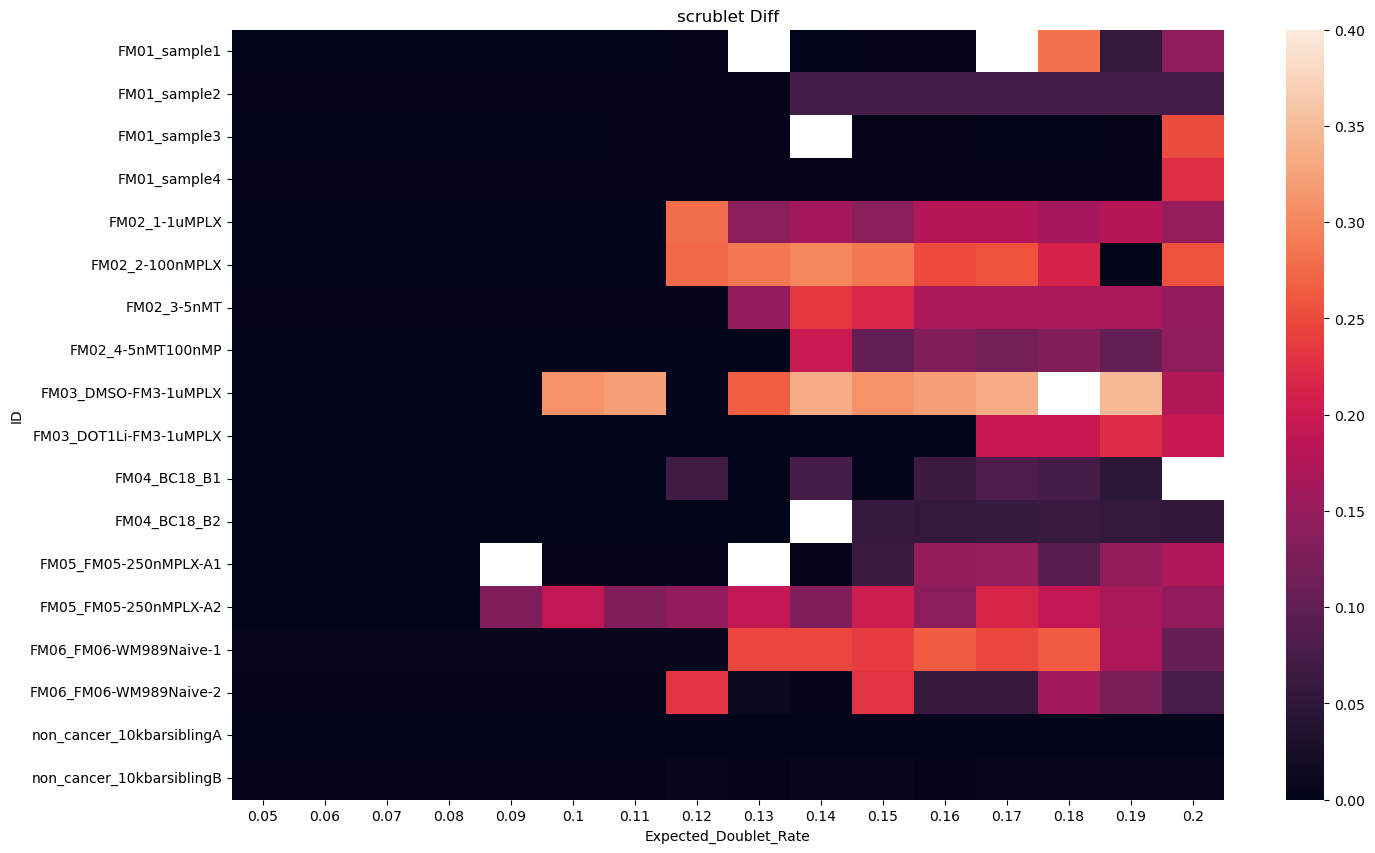

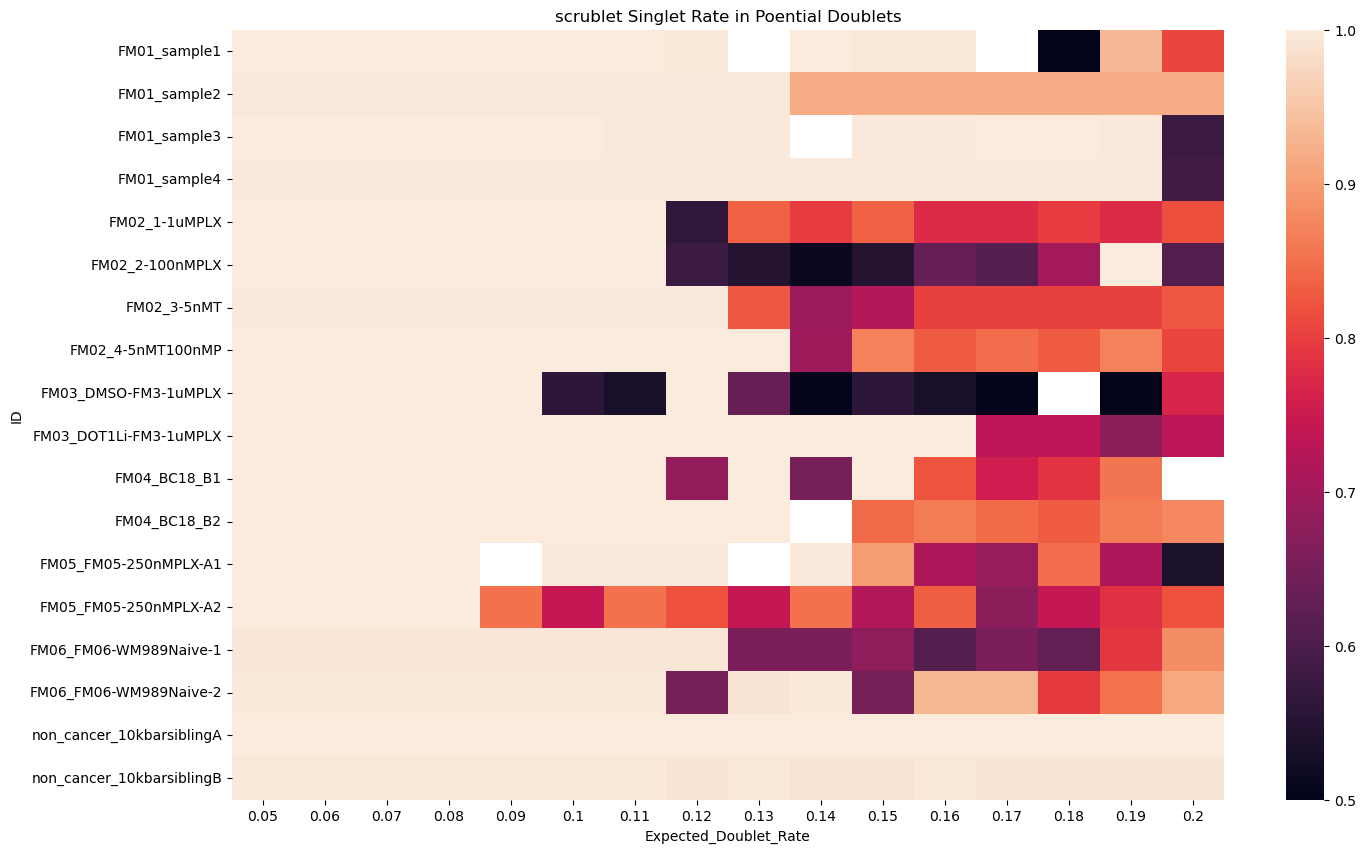

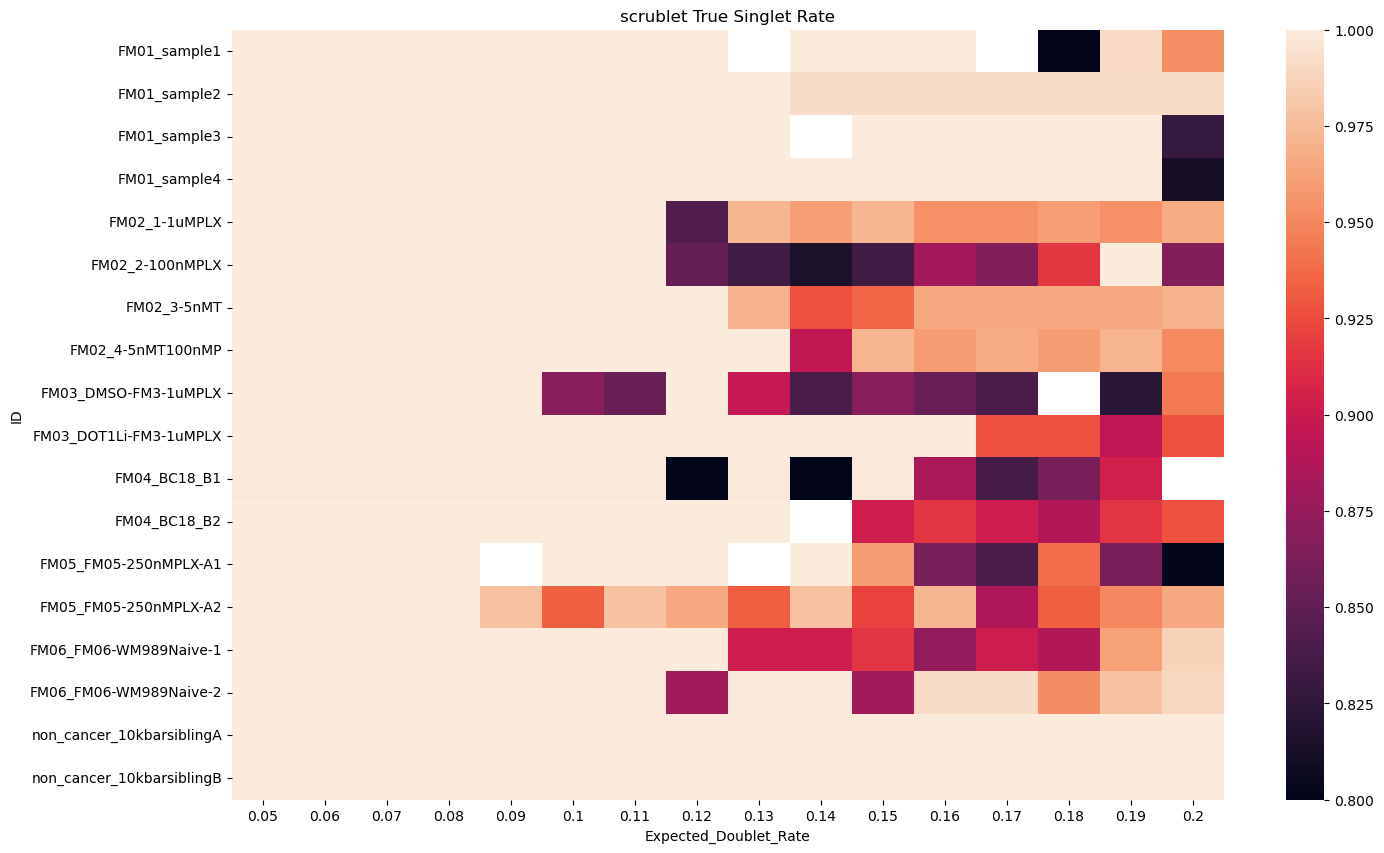

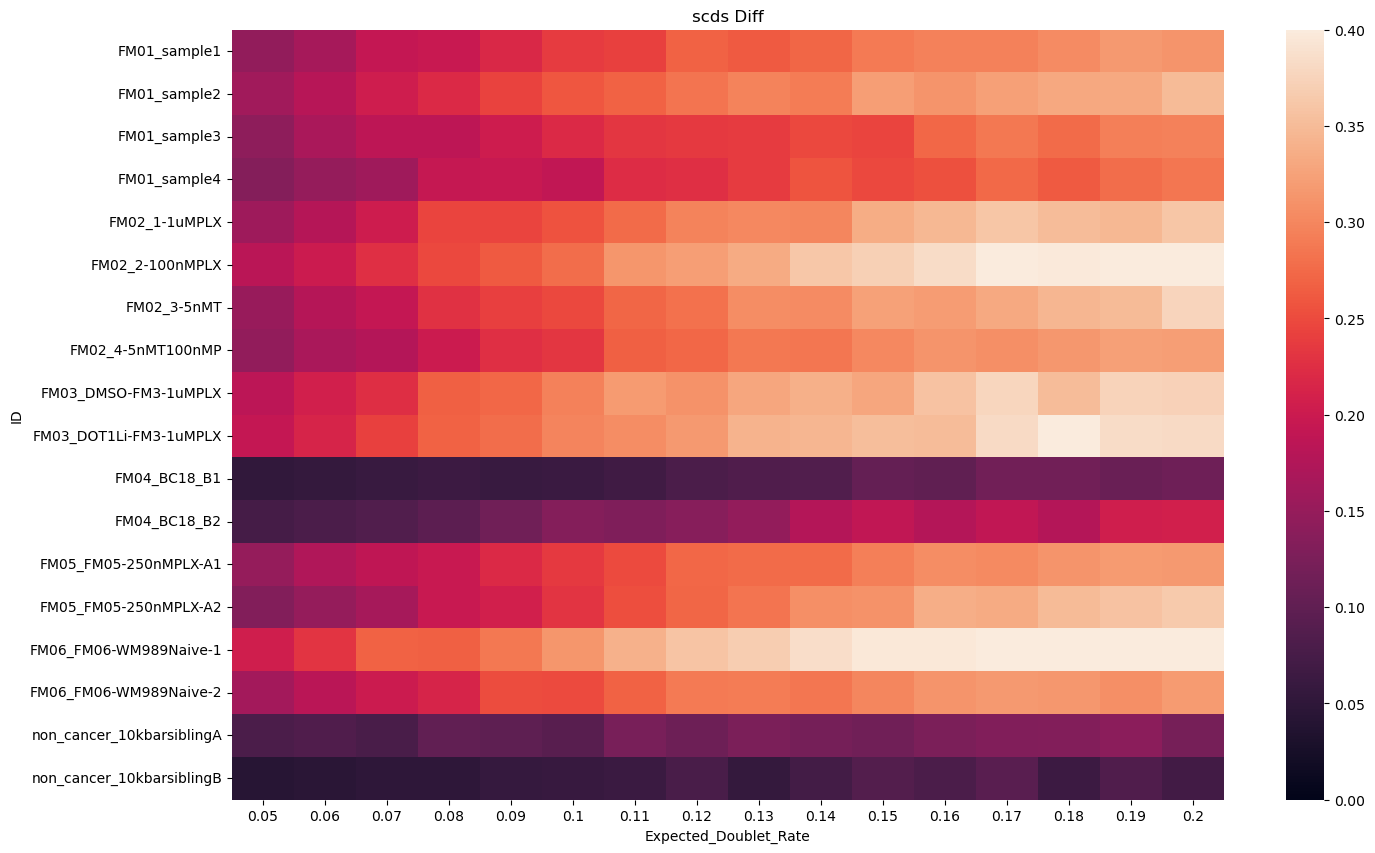

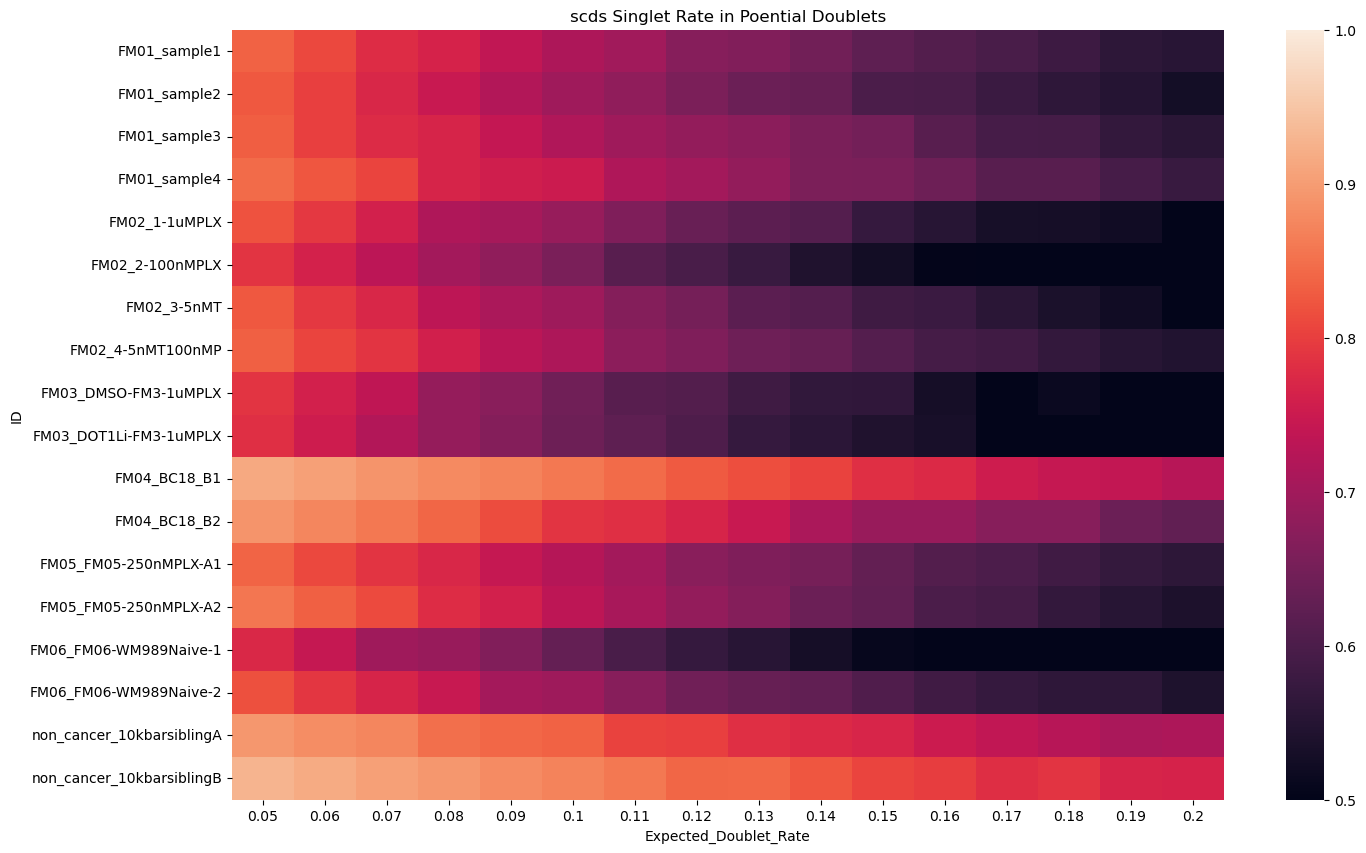

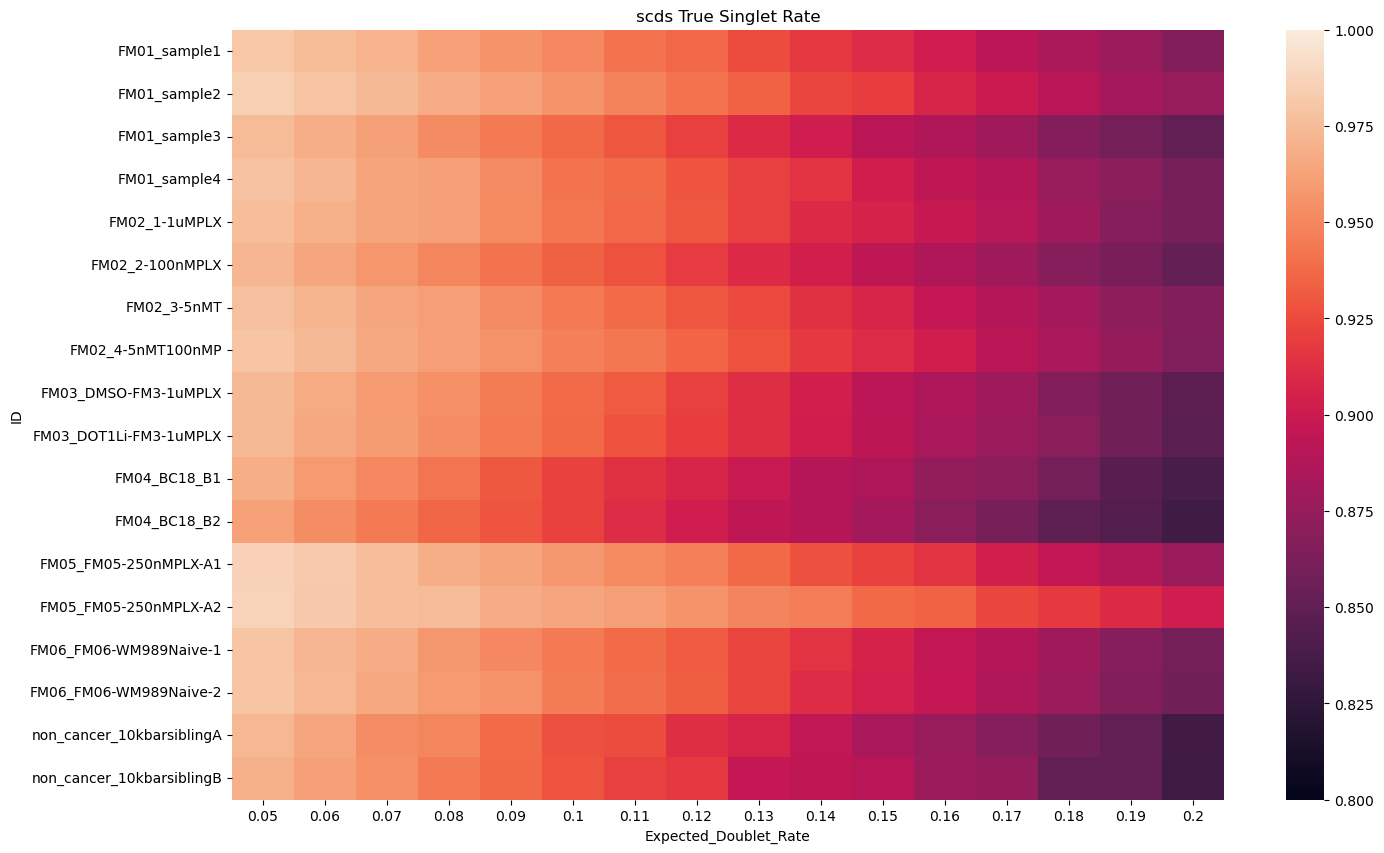

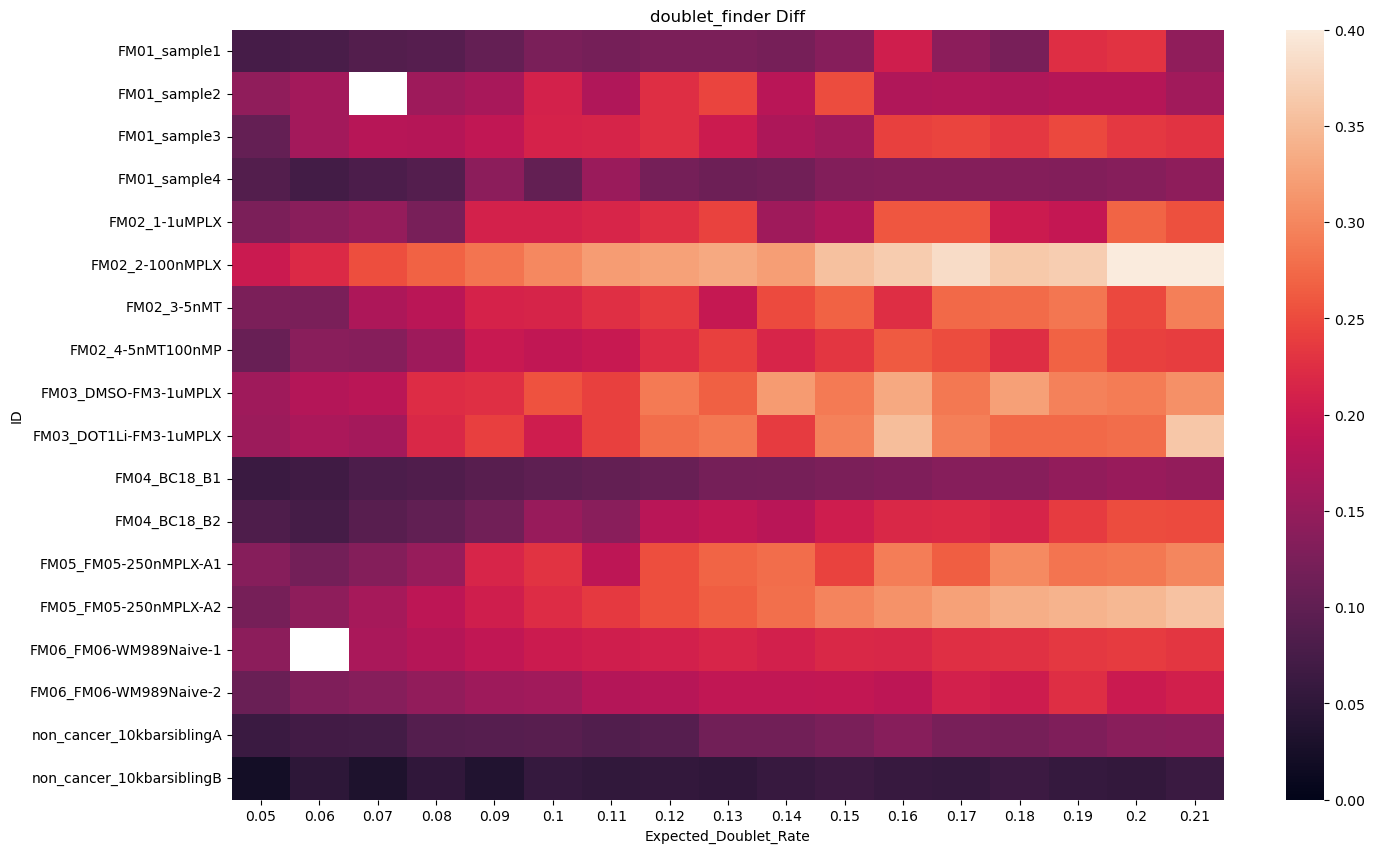

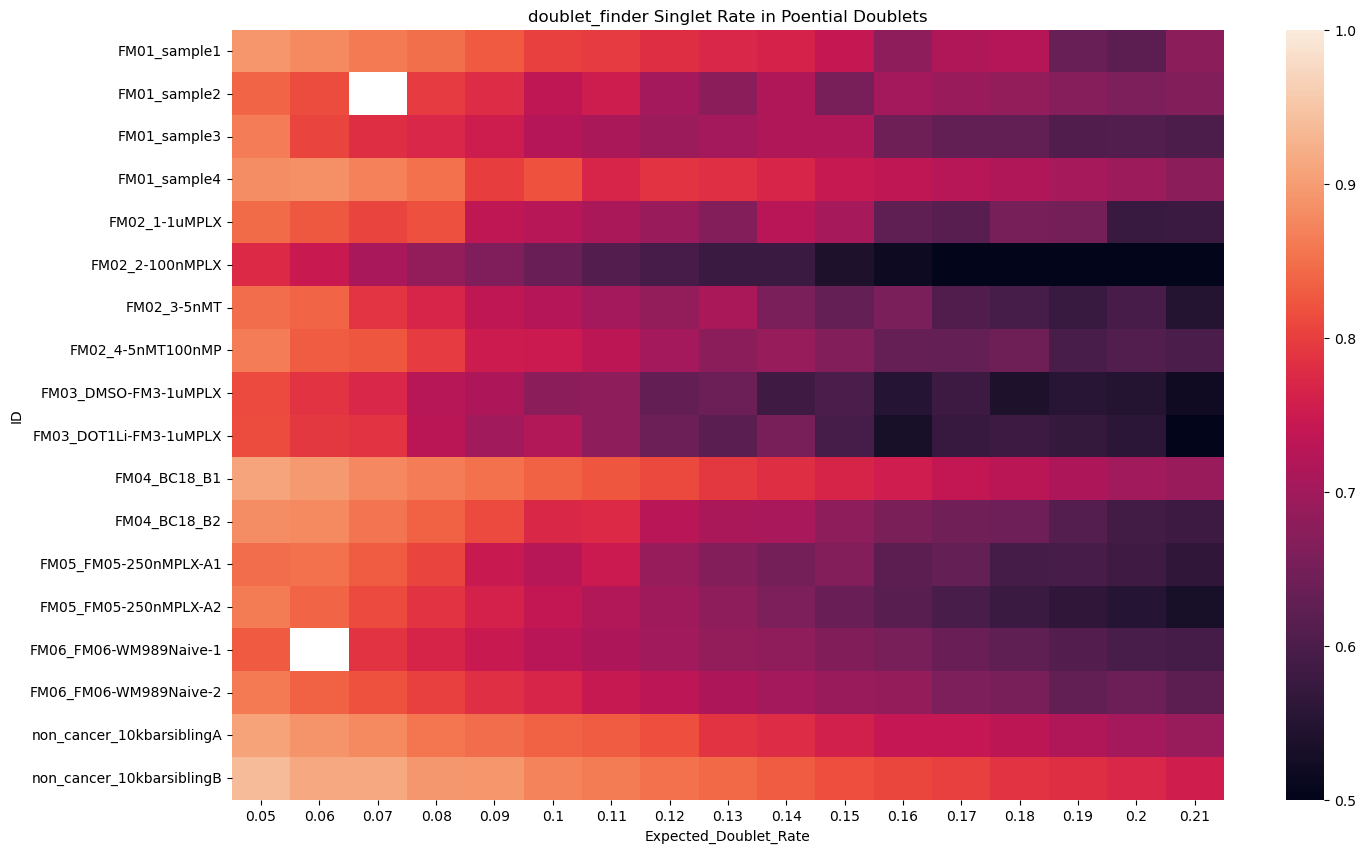

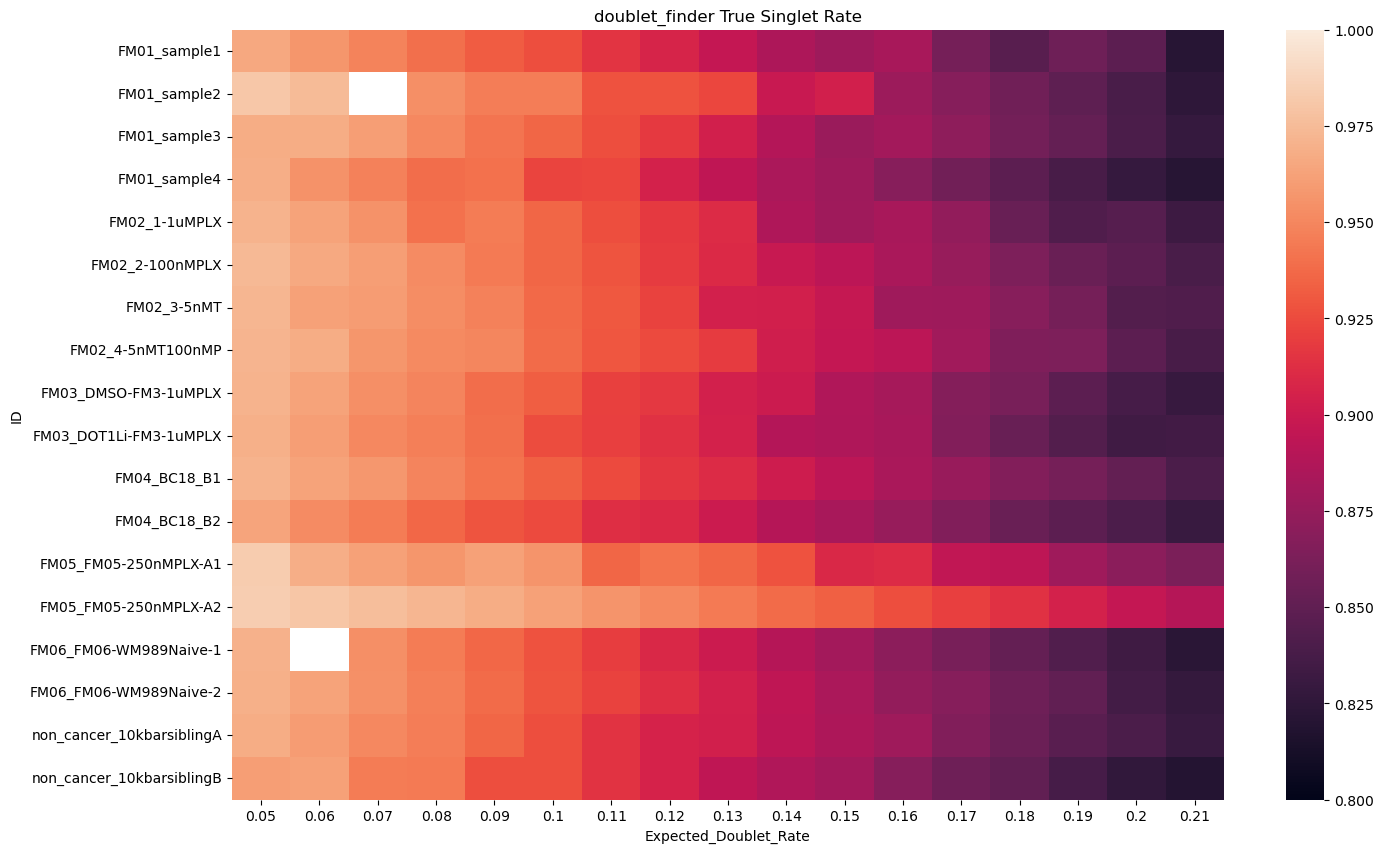

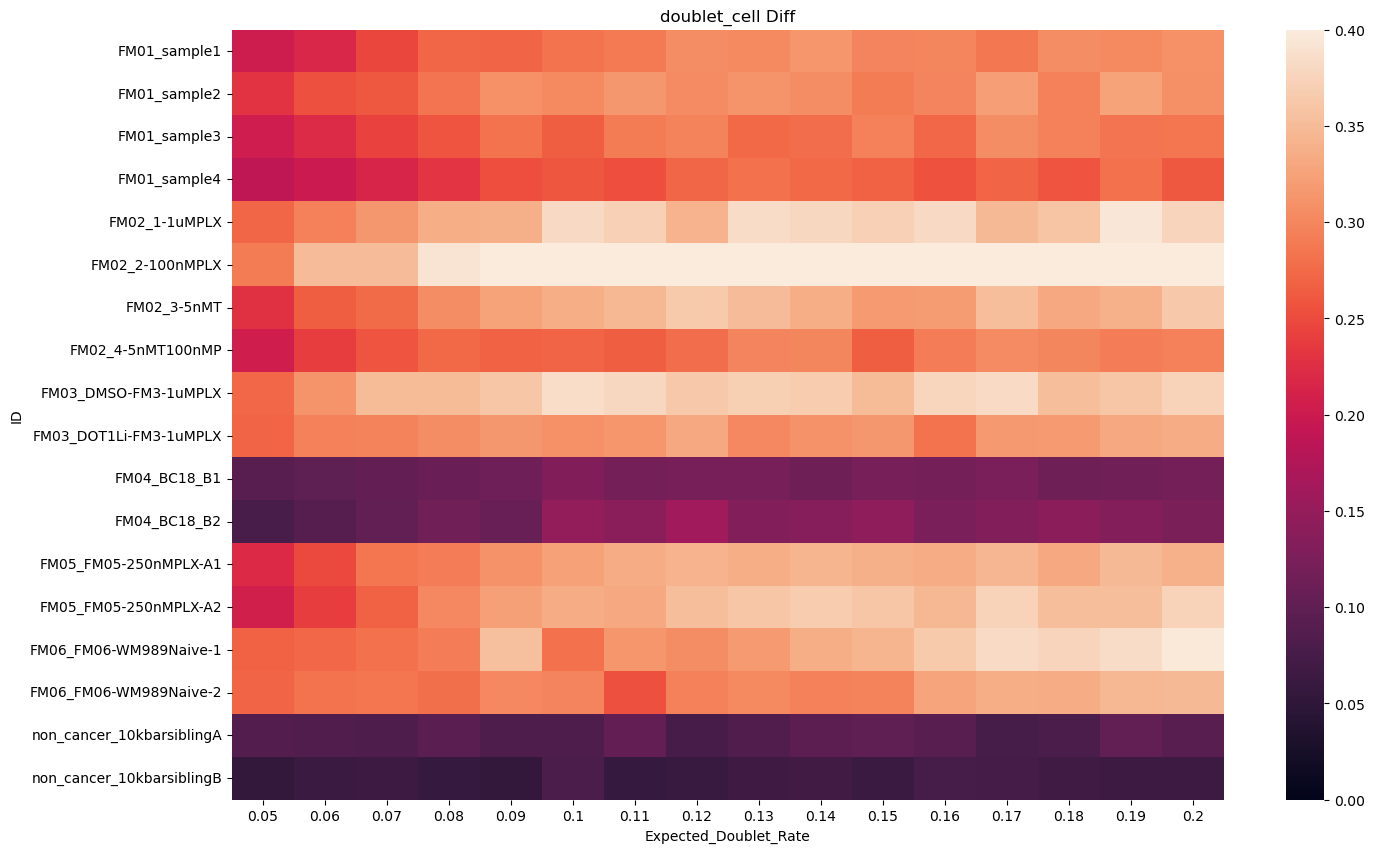

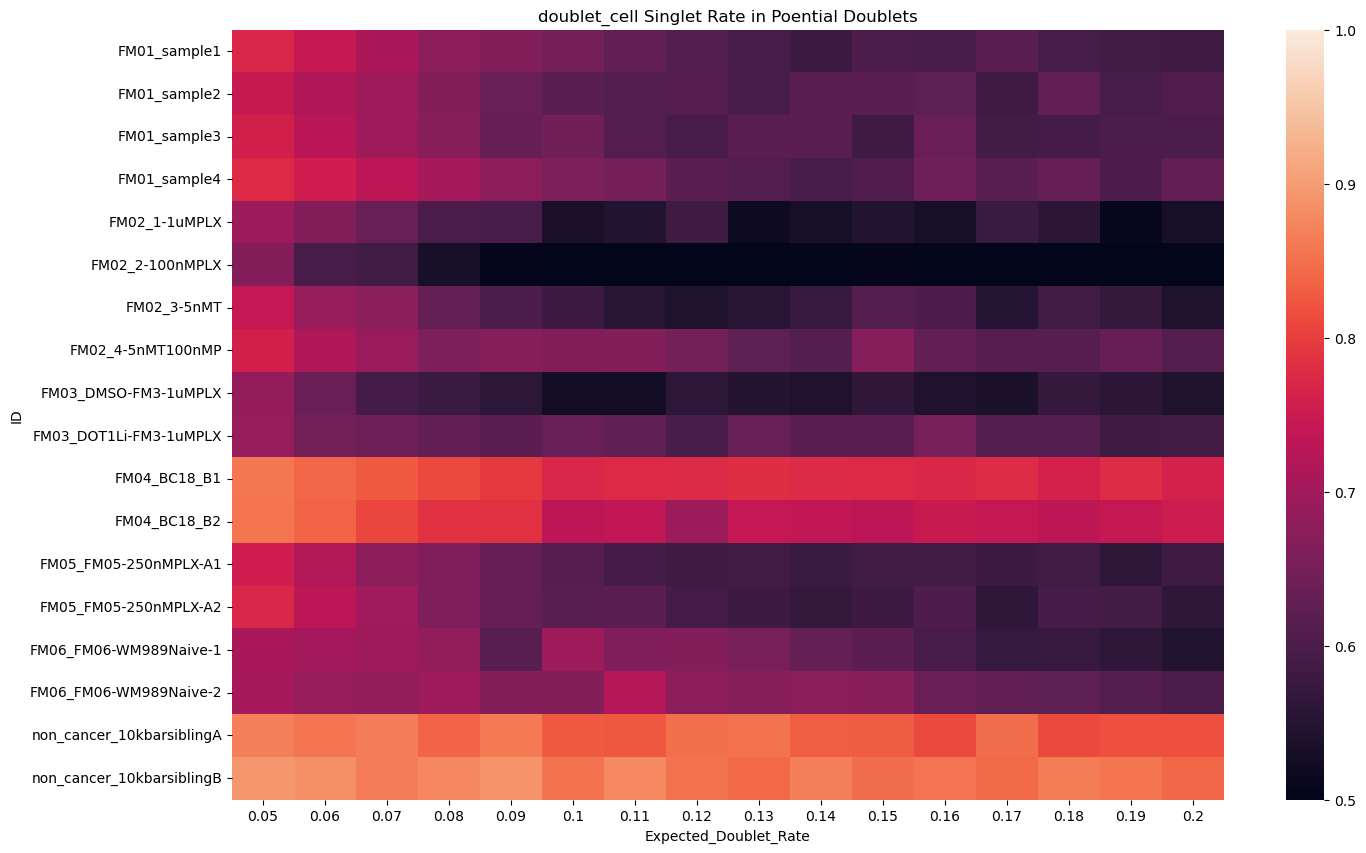

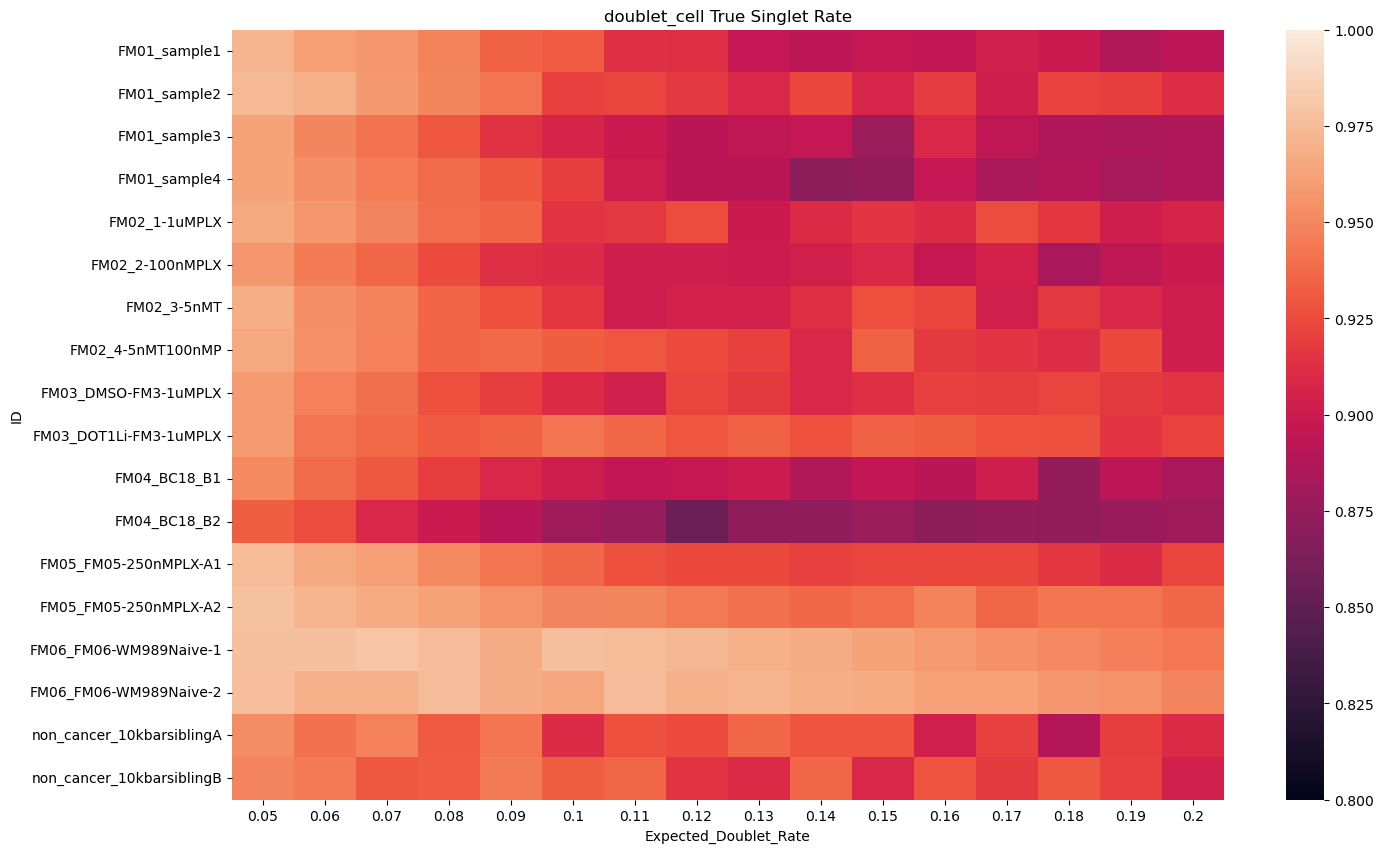

In [6]:
for cur_file in files:
    cur_id=cur_file.split("/")[-3]
    cur_df=pd.read_csv(cur_file,sep="\t").sort_values(by=["Expected_Doublet_Rate","ID"])
    cur_true_singlet=pd.pivot_table(cur_df, \
                                       values="True_Singlet_Detection_Rate", \
                                       index="ID", \
                                       columns="Expected_Doublet_Rate")
    cur_singlet_in_potential_doublet=pd.pivot_table(cur_df, \
                                                       values="Singet_in_Potential_Doublet_Detection_Rate", \
                                                       index="ID", \
                                                       columns="Expected_Doublet_Rate")
    cur_diff=cur_true_singlet-cur_singlet_in_potential_doublet
    
    sns.heatmap(cur_diff, vmin=0, vmax=0.4)
    plt.title("{} Diff".format(cur_id))
    plt.savefig("{}/{}_diff.svg".format(out_dir, cur_id),format="svg")
    plt.savefig("{}/{}_diff.pdf".format(out_dir, cur_id),format="pdf")
    plt.show()
    plt.clf()
    
    sns.heatmap(cur_singlet_in_potential_doublet,vmin=0.5, vmax=1.0)
    plt.title("{} Singlet Rate in Poential Doublets".format(cur_id))
    plt.savefig("{}/{}_singlet_in_potential_doublet_rate.svg".format(out_dir, cur_id),format="svg")
    plt.savefig("{}/{}_singlet_in_potential_doublet_rate.pdf".format(out_dir, cur_id),format="pdf")
    plt.show()
    plt.clf()
    
    sns.heatmap(cur_true_singlet,vmin=0.8, vmax=1.0)
    plt.title("{} True Singlet Rate".format(cur_id))
    plt.savefig("{}/{}_true_singlet_rate.svg".format(out_dir, cur_id),format="svg")
    plt.savefig("{}/{}_true_singlet_rate.pdf".format(out_dir, cur_id),format="pdf")
    plt.show()
    plt.clf()

In [10]:
bar_mtx=[]
for cur_file in files:
    cur_id=cur_file.split("/")[-3]
    cur_df=pd.read_csv(cur_file,sep="\t").sort_values(by=["Expected_Doublet_Rate","ID"])
    cur_true_singlet=pd.pivot_table(cur_df, \
                                       values="True_Singlet_Detection_Rate", \
                                       index="ID", \
                                       columns="Expected_Doublet_Rate")
    cur_singlet_in_potential_doublet=pd.pivot_table(cur_df, \
                                                       values="Singet_in_Potential_Doublet_Detection_Rate", \
                                                       index="ID", \
                                                       columns="Expected_Doublet_Rate")
    cur_diff=cur_true_singlet-cur_singlet_in_potential_doublet
    bar_mtx.append([cur_id, ])

ID
FM01_sample1                 0.270620
FM01_sample2                 0.283016
FM01_sample3                 0.257691
FM01_sample4                 0.230794
FM02_1-1uMPLX                0.336968
FM02_2-100nMPLX              0.391276
FM02_3-5nMT                  0.305350
FM02_4-5nMT100nMP            0.274674
FM03_DMSO-FM3-1uMPLX         0.349209
FM03_DOT1Li-FM3-1uMPLX       0.305683
FM04_BC18_B1                 0.108897
FM04_BC18_B2                 0.116429
FM05_FM05-250nMPLX-A1        0.291039
FM05_FM05-250nMPLX-A2        0.301322
FM06_FM06-WM989Naive-1       0.290793
FM06_FM06-WM989Naive-2       0.279622
non_cancer_10kbarsiblingA    0.093753
non_cancer_10kbarsiblingB    0.056423
Name: 0.08, dtype: float64

In [13]:
cur_diff

Expected_Doublet_Rate,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20
ID,,,,,,,,,,,,,,,,
FM01_sample1,0.202029,0.216909,0.246573,0.270620,0.269445,0.282022,0.288076,0.305816,0.302598,0.313965,0.296915,0.298550,0.287028,0.306127,0.302620,0.308660
FM01_sample2,0.228172,0.253460,0.259918,0.283016,0.308155,0.302866,0.314247,0.303441,0.312078,0.304917,0.290188,0.297072,0.320468,0.294853,0.326262,0.307492
FM01_sample3,0.204161,0.220907,0.243366,0.257691,0.281879,0.264214,0.290204,0.296800,0.274555,0.277024,0.295058,0.272480,0.305387,0.294891,0.283727,0.285433
FM01_sample4,0.188765,0.198515,0.214282,0.230794,0.252966,0.259293,0.251848,0.271812,0.280729,0.273782,0.268646,0.254776,0.269745,0.257541,0.279795,0.259695
FM02_1-1uMPLX,0.271781,0.294155,0.315079,0.336968,0.338413,0.379775,0.371726,0.342106,0.382979,0.379125,0.370436,0.380575,0.347903,0.358843,0.394254,0.376545
FM02_2-100nMPLX,0.289887,0.350291,0.350068,0.391276,0.408815,0.414292,0.403357,0.412306,0.428116,0.408401,0.404617,0.422432,0.413999,0.421173,0.438759,0.415607
FM02_3-5nMT,0.227858,0.264093,0.275823,0.305350,0.326354,0.336471,0.346605,0.365292,0.350903,0.336195,0.318665,0.320250,0.352773,0.331925,0.339586,0.363670
FM02_4-5nMT100nMP,0.206215,0.238318,0.257452,0.274674,0.267871,0.268934,0.264896,0.277227,0.297636,0.298914,0.264470,0.291259,0.303802,0.299976,0.290833,0.293813
FM03_DMSO-FM3-1uMPLX,0.273113,0.311678,0.348907,0.349209,0.360600,0.384768,0.378830,0.363357,0.369246,0.366940,0.349686,0.376944,0.382520,0.351780,0.360351,0.374325
